<a href="https://colab.research.google.com/github/Amadou794545/prediction_du_couts_de_frais_medicaux/blob/main/Pr%C3%A9diciton_des_co%C3%BBts_m%C3%A9dicaux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Objectif
---





L’objectif principal de ce projet est de développer un modèle prédictif capable d’estimer avec précision les coûts médicaux des individus en fonction de leurs caractéristiques. En analysant l’ensemble de données et en identifiant des tendances et des relations, le modèle fournira des informations sur les facteurs influençant les dépenses médicales.








#import

---



In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#Dataset

---



* age	:age du beneficiare principal
* bmi	:indice de masse corporelles (IMC)
* children:	nombre d enfant couvert par l assurance maladie
* smoker:	fumeur
* region:	la région du beneficiaire
* charges:	frais médicaux individuels facturés par l'assurance maladie

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#Nettoyage
---

In [9]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
df.shape

(1338, 7)

In [16]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [17]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [18]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

**Remplaçons les variables catégorielles par des 0 ou des 1**



*  female = 0 & male = 1
*  smoker yes = 1 & no = 2
*  southwest = 0, southeast = 1, northwest = 2 & northeast = 3



In [19]:
df['sex']=df['sex'].apply(lambda x: 0 if x=='female' else 1)
df['smoker']=df['smoker'].apply(lambda x: 1 if x=='yes' else 0)
df['region']=df['region'].apply(lambda x: 0 if x=='southwest' else (1 if x=='southeast' else (2 if x=='northwest' else 3)))

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


#Analyse exploratoire des données
---

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.484305,1.104885,0.0000,1.00000,1.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


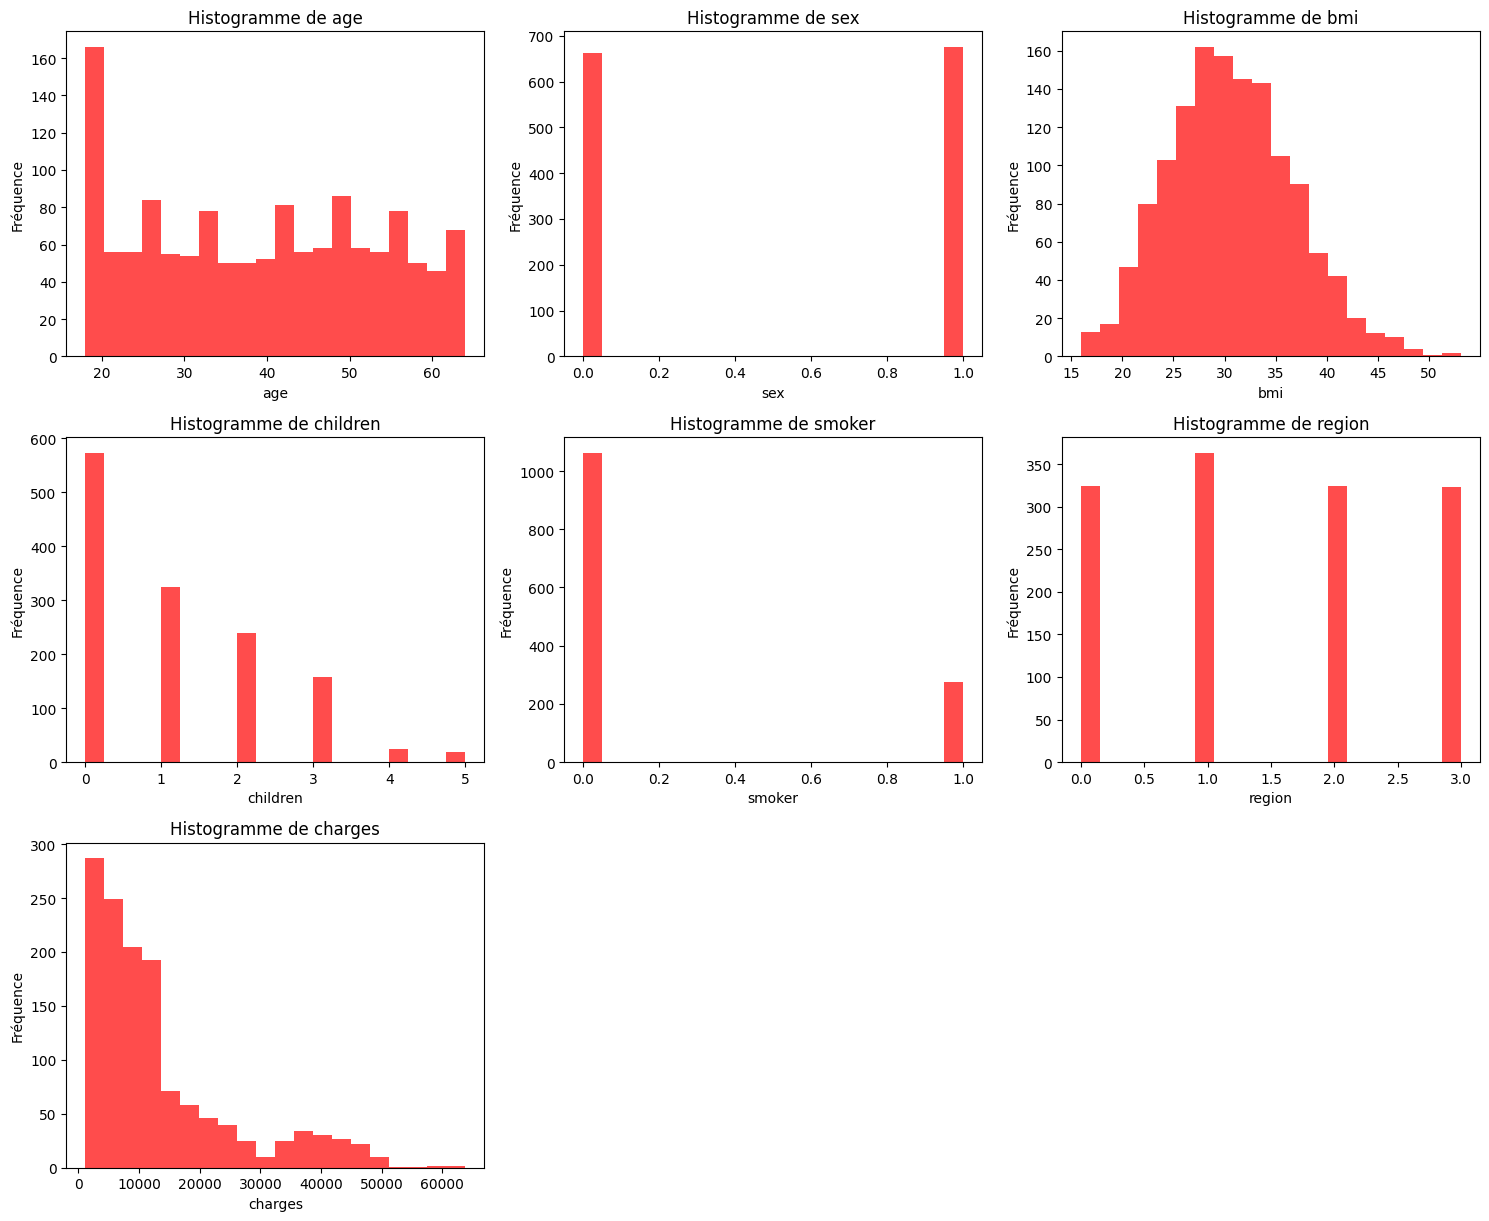

In [25]:
 # Sélectionner uniquement les colonnes numériques
numeric_columns = df.select_dtypes(include='number')
 # Afficher un histogramme pour chaque colonne numérique
plt.figure(figsize=(15, 20))  # Adapter la taille de la figure en fonction du nombre de colonnes
num_cols = len(numeric_columns.columns)
 # Créer une grille de sous-graphiques adaptée au nombre de colonnes numériques
for i, column in enumerate(numeric_columns.columns):
    plt.subplot(5, 3, i + 1)  # Adapté à 15 colonnes numériques
    plt.hist(df[column], bins=20, color='red', alpha=0.7)
    plt.title(f'Histogramme de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()
plt.close()

<ipython-input-26-f41c16936cf8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")
<ipython-input-26-f41c16936cf8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")
<ipython-input-26-f41c16936cf8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")
<ipython-input-26-f41c16936cf8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effec

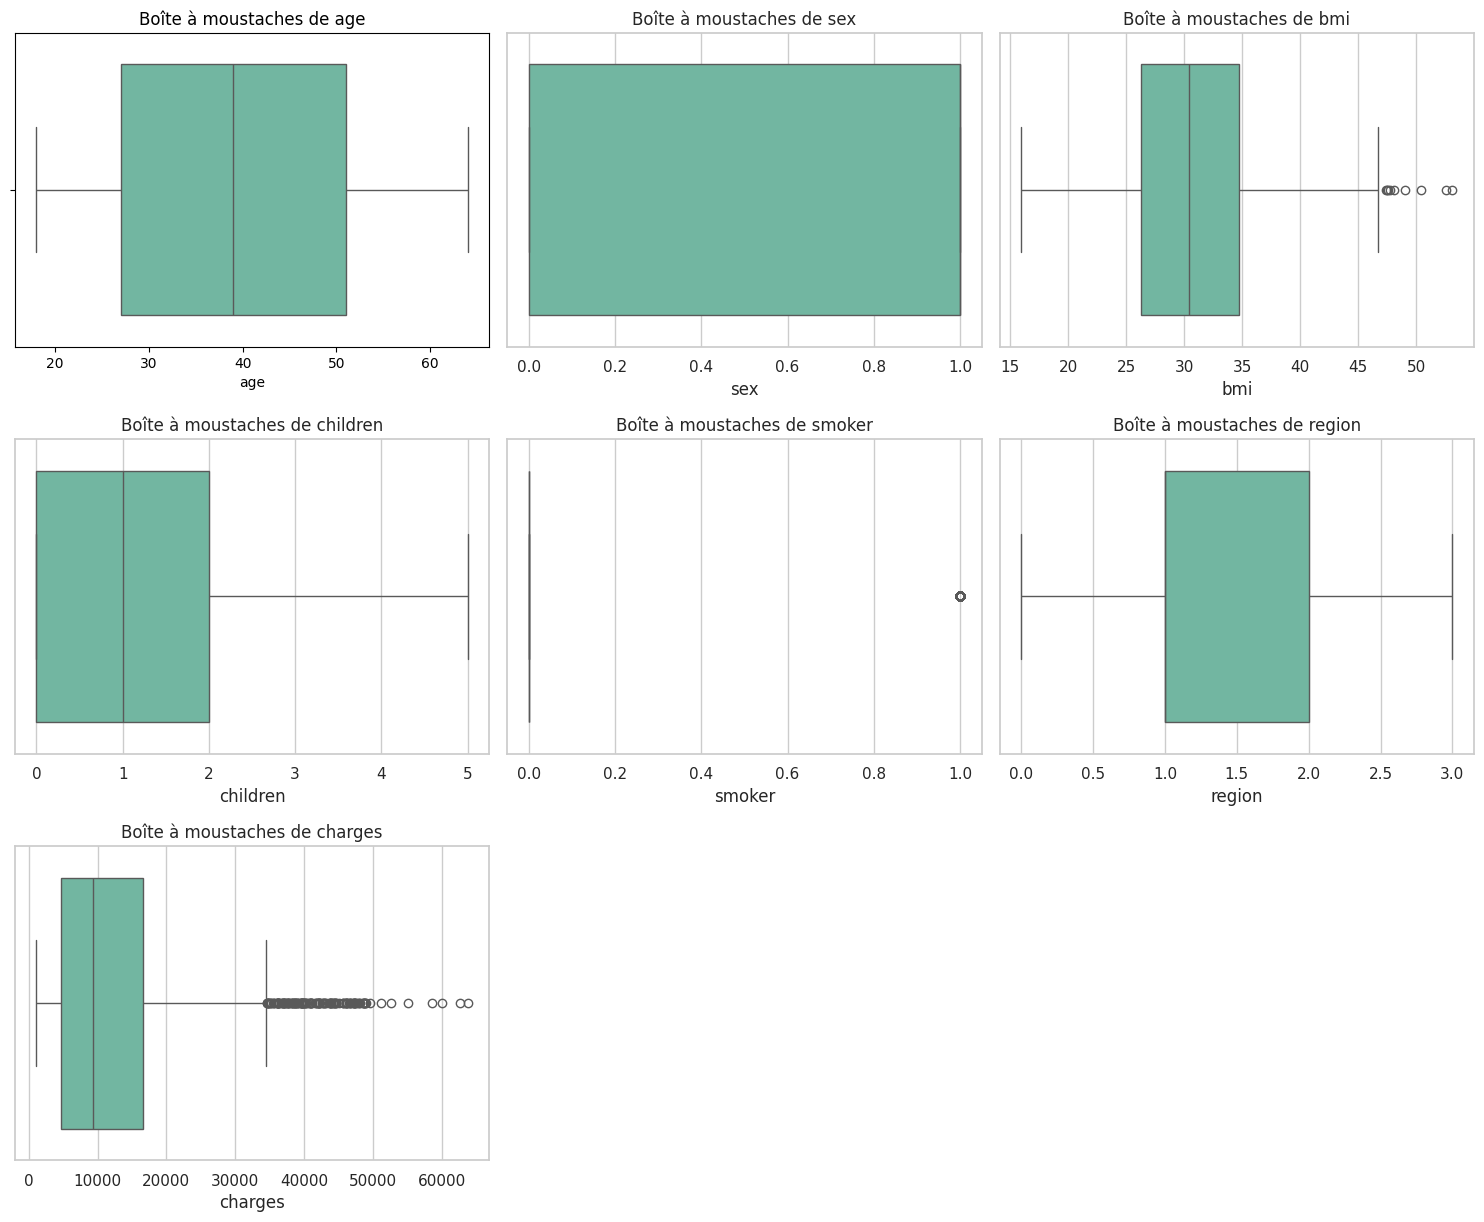

In [26]:
# Afficher des boîtes à moustaches pour chaque colonne numérique (avec axes séparés)
plt.figure(figsize=(15, 20))  # Adapter la taille de la figure en fonction du nombre de colonnes
num_cols = len(numeric_columns.columns)
 # Créer une grille de sous-graphiques pour les boîtes à moustaches
for i, column in enumerate(numeric_columns.columns):
    plt.subplot(5, 3, i + 1)  # Adapté à 15 colonnes numériques
    sns.set(style="whitegrid")
    sns.boxplot(x=df[column], palette="Set2")
    plt.title(f'Boîte à moustaches de {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()
plt.close()

<ipython-input-30-939d949e7226>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y=cat_var, palette="Set2")
<ipython-input-30-939d949e7226>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y=cat_var, palette="Set2")
<ipython-input-30-939d949e7226>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y=cat_var, palette="Set2")
<ipython-input-30-939d949e7226>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variabl

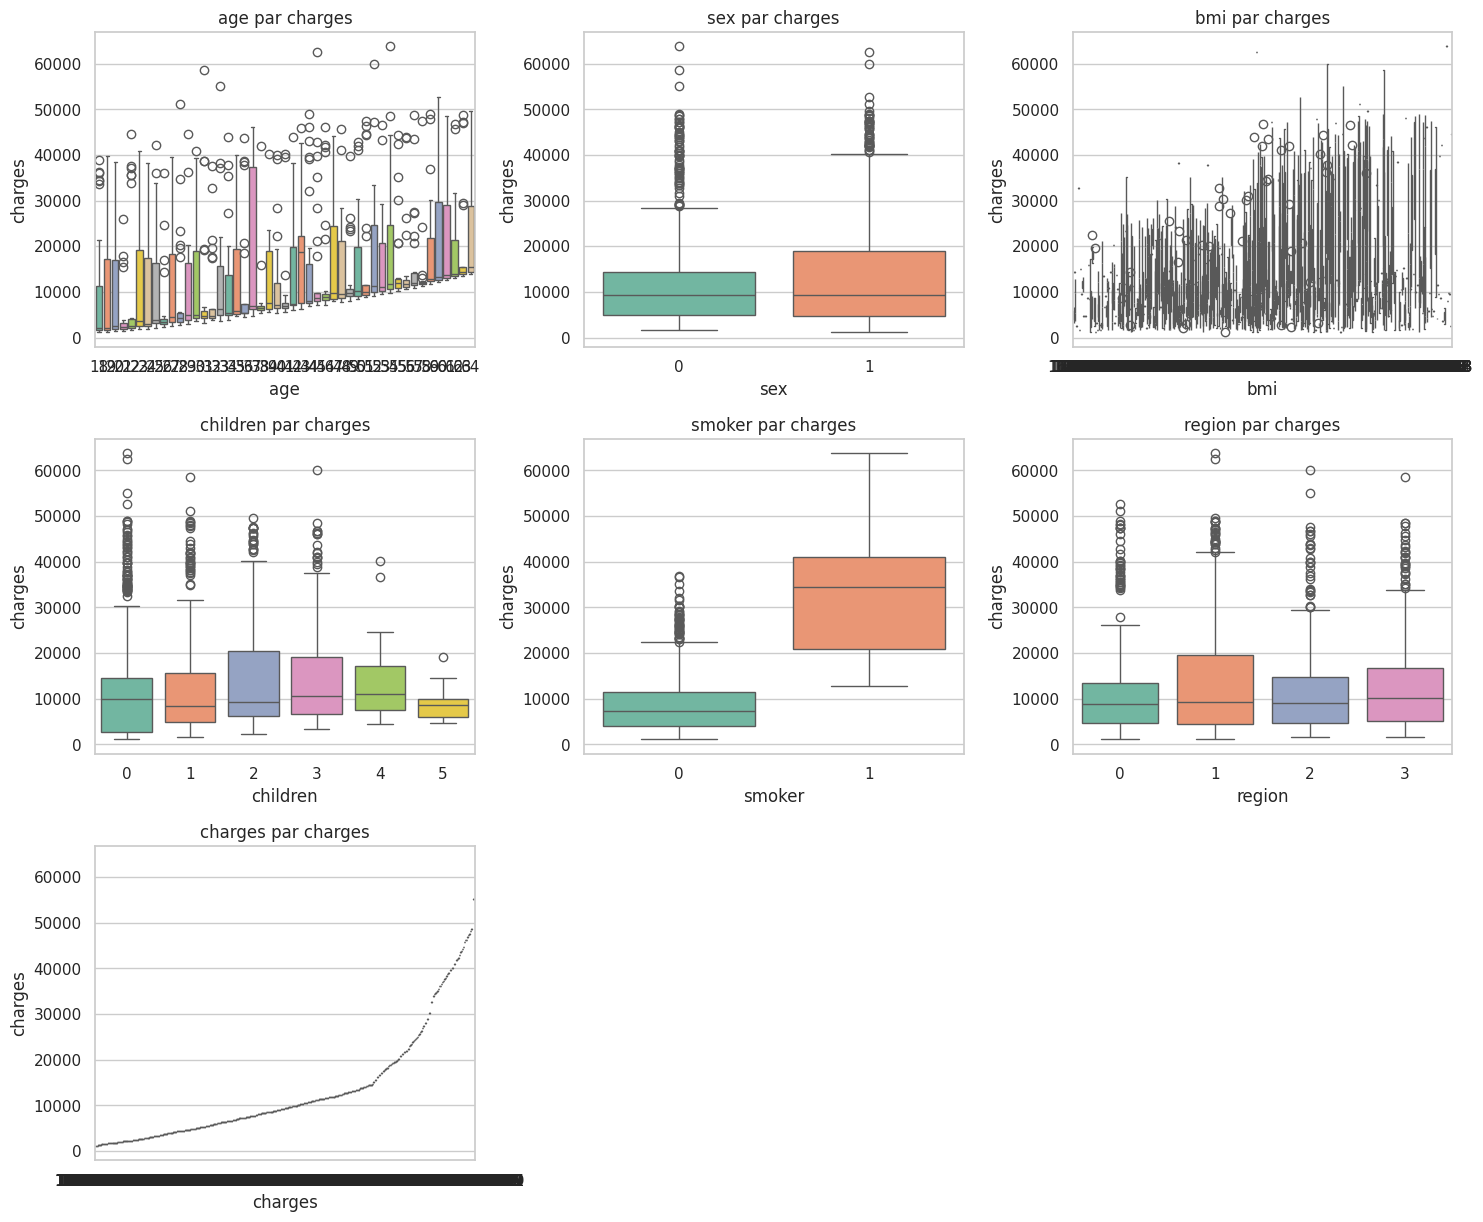

In [30]:
def plot_discretize_distributions(df, cat_var):
  plt.figure(figsize=(15, 20))

  # Sélectionner uniquement les colonnes numériques
  numeric_columns = df.select_dtypes(include='number')

  # Créer une grille de sous-graphiques pour les boîtes à moustaches
  for i, column in enumerate(numeric_columns.columns):
      plt.subplot(5, 3, i + 1)  # Adapté à 15 colonnes numériques
      sns.set(style="whitegrid")
      sns.boxplot(data=df, x=column, y=cat_var, palette="Set2")
      plt.title(column + ' par ' + cat_var)
      plt.xlabel(column)
      plt.ylabel(cat_var)

  plt.tight_layout()
  plt.show()
  plt.close()

plot_discretize_distributions(df, 'charges')

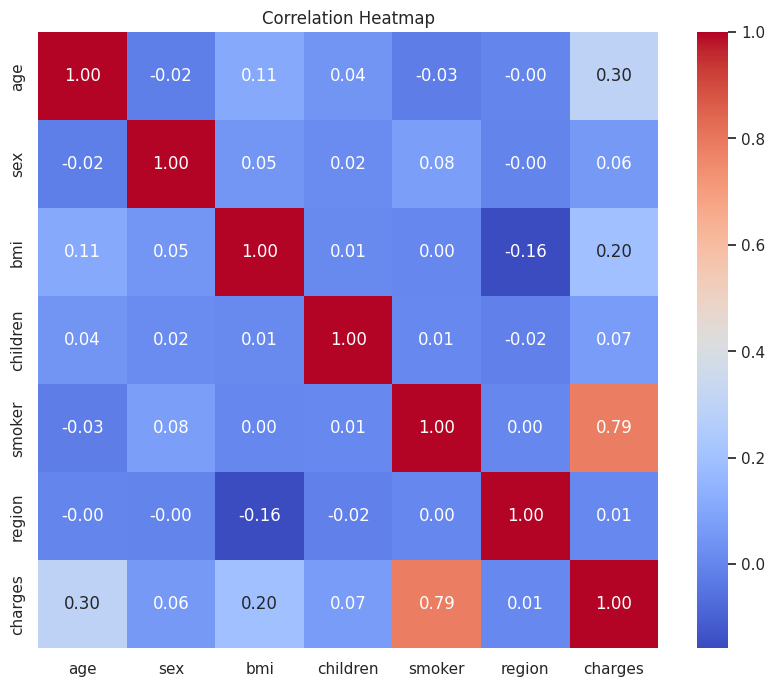

In [29]:
plt.figure(figsize=(10, 8))
corr_mat = df.corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Sur cette corrélation nous pouvons remarquer:

*   Corrélation positive forte entre "charges" et "smoker"
*   Corrélation positive entre "charges" et "age" et "bmi"
*   Faible corrélation entre "charges" et "sex", "children" et "region"
*   Corrélation positive entre "bmi" et "age"
*   Corrélation positive entre "smoker" et "charges"




---



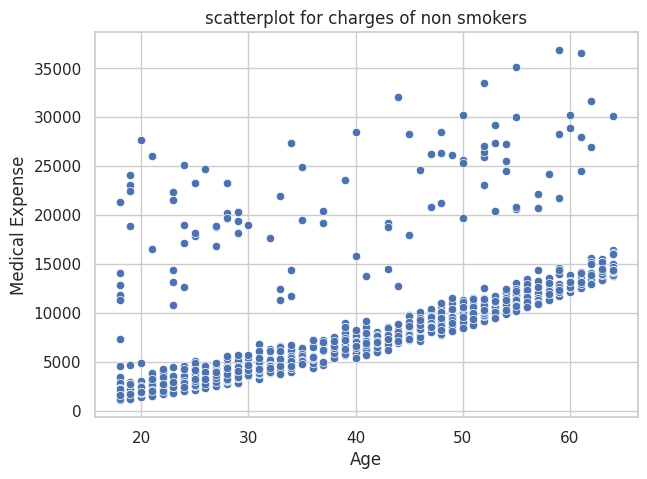

In [33]:
#charge des non fumeur
plt.figure(figsize=(7,5))
plt.title("scatterplot for charges of non smokers")
sns.scatterplot(x="age", y="charges", data =  df[(df.smoker == 0)])
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

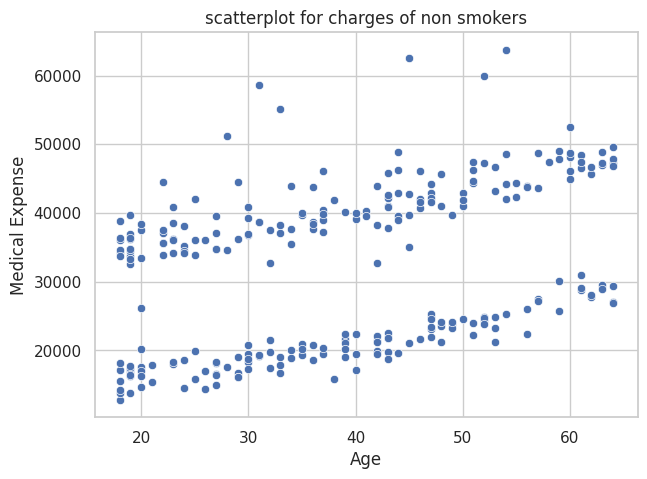

In [34]:
#charge des fumeur
plt.figure(figsize=(7,5))
plt.title("scatterplot for charges of non smokers")
sns.scatterplot(x="age", y="charges", data =  df[(df.smoker == 1)])
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

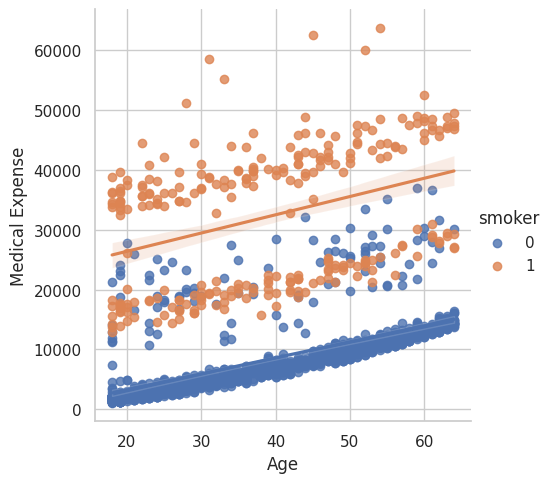

In [35]:
sns.lmplot(x="age", y="charges", data =  df, hue = 'smoker')
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

Grâce à l’EDA, nous avons une compréhension claire des données et de la coordination entre les variables. Maintenant, je vais construire un modèle pour prédire les dépenses médicales des patients.



#division des données

In [38]:
X = df.drop('charges', axis=1)
y = df['charges']

In [39]:
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=42)
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((1070, 6), (268, 6), (1070,), (268,))

#Modelisation avec régression lineaire

In [40]:
RL_model=LinearRegression()
RL_model.fit(train_X,train_y)

LinearRegression()

In [41]:
y_pred=RL_model.predict(test_X)

In [46]:
RL_model.score(test_X,test_y)

0.7833463107364539

<ipython-input-47-035ba2aa8830>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(test_y,hist=False,color='r',label='Actual Value')
<ipython-input-47-035ba2aa8830>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,hist=False,color='b',label='Predicted Value',ax=ax1)


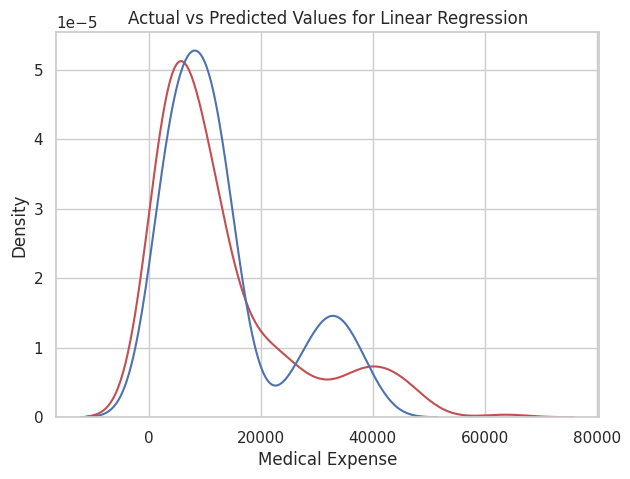

In [47]:
plt.figure(figsize=(7,5))
ax1 = sns.distplot(test_y,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Linear Regression')
plt.xlabel('Medical Expense')
plt.show()

#modélisation avec Random Forest Regression

In [54]:
rfr_model = RandomForestRegressor(n_estimators=100)
rfr_model.fit(train_X, train_y)


RandomForestRegressor()

In [51]:
pred_y=rfr_model.predict(test_X)
rfr_model.score(test_X,test_y)

0.8654706863415803

<ipython-input-52-1e2ad2dcc49e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(test_y,hist=False,color='r',label='Actual Value')
<ipython-input-52-1e2ad2dcc49e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_y,hist=False,color='b',label='Predicted Value',ax=ax1)


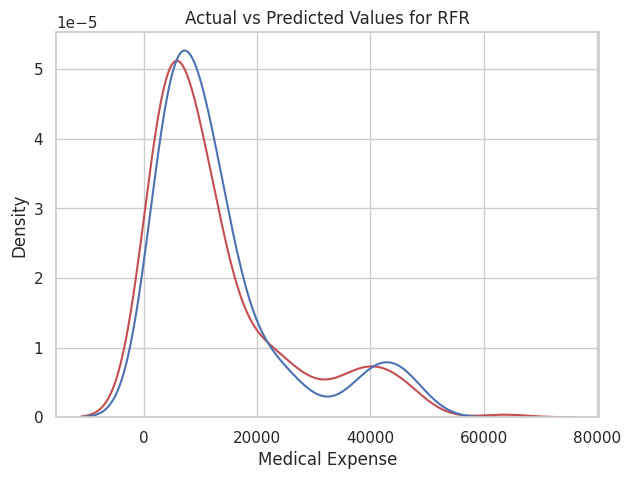

In [52]:
plt.figure(figsize=(7,5))
ax1 = sns.distplot(test_y,hist=False,color='r',label='Actual Value')
sns.distplot(pred_y,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for RFR')
plt.xlabel('Medical Expense')
plt.show()

#Conclusion